In [3]:
from plant_processing import Source 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import requests 
from datetime import date
import seaborn as sns

In [4]:
api_key = "9b5bd2cd0c808cd58f2673a9a5a51a4b"
latitude = 13.082680
longitude = 80.270721
date = date.today()
interval  = "15m"  #15 minute intervals

url_sunhours = "https://api.openweathermap.org/energy/1.0/solar/interval_data?lat={}&lon={}&date={}&interval={}&tz=+05:30&appid={}".format(latitude,longitude,date,interval,api_key)

print(url_sunhours)

https://api.openweathermap.org/energy/1.0/solar/interval_data?lat=13.08268&lon=80.270721&date=2024-05-21&interval=15m&tz=+05:30&appid=9b5bd2cd0c808cd58f2673a9a5a51a4b


Importing the dataset that has been processed

In [5]:
dataset = pd.read_csv("/Users/aditirajesh/Desktop/program_files/python/SolSight/DATA_PLANTS/plant1/data15_1.csv")
x = dataset.iloc[:,1:4].values
y = dataset.iloc[:,-1].values

print(dataset)

          DATE  AMBIENT_TEMP  MODULE_TEMP  SUN_HOURS        YIELD
0   2020-05-15     30.101998    40.874126   4.758980  6176.000000
1   2020-05-16     28.693978    38.971222   4.662886  6450.000000
2   2020-05-17     29.629909    42.436575   5.732761  7391.000000
3   2020-05-18     25.220109    33.840217   3.816491  5286.000000
4   2020-05-19     27.493836    38.077856   4.511132  6790.000000
5   2020-05-20     27.210057    40.353065   4.561357  8663.750000
6   2020-05-21     29.383561    45.335427   5.889043  7598.571429
7   2020-05-22     28.612870    41.123396   5.529507  7000.000000
8   2020-05-23     29.387591    45.663036   6.526639  8394.857143
9   2020-05-24     29.915382    43.727070   6.233824  7554.750000
10  2020-05-25     29.942647    45.106869   6.807852  8085.000000
11  2020-05-26     29.596173    43.869744   6.062268  7712.000000
12  2020-05-27     29.593112    41.672768   5.134159  6564.000000
13  2020-05-28     29.773013    43.832226   6.507684  8314.750000
14  2020-0

Taking care of missing data

In [6]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')   #replacing all the missing values in the dataset with the mean.
imputer.fit(x[:,:]) #connects the imputer to the matriX of features 
x[:,:] = imputer.transform(x[:,:])

splitting into training and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [8]:
print(x_train)

[[28.03983971 41.23770041  6.18838124]
 [27.51155175 40.87831824  6.32840767]
 [25.57319506 36.26199037  5.28181448]
 [26.64328674 36.41016834  4.41227455]
 [26.21718273 36.66908999  4.88145697]
 [27.49383641 38.07785602  4.5111318 ]
 [29.62990882 42.43657514  5.73276118]
 [26.71711648 39.71198696  5.79792043]
 [26.86290034 40.54402348  6.10051658]
 [29.94264667 45.10686872  6.80785204]
 [26.50030695 39.44357529  6.3472695 ]
 [25.51805706 33.58812148  4.07532137]
 [25.97848728 37.30092915  5.37085158]
 [29.3835608  45.33542748  5.88904259]
 [29.77301323 43.83222563  6.50768408]
 [28.61286954 41.12339552  5.5295069 ]
 [25.58981265 34.39341602  4.24711837]
 [28.69397798 38.97122218  4.66288575]
 [27.06615388 37.55329119  4.40604077]
 [30.10199783 40.87412642  4.75898038]
 [26.87503912 39.17429219  5.46849998]
 [27.21005677 40.35306523  4.56135707]
 [29.59617275 43.86974369  6.0622681 ]
 [29.9153818  43.72707039  6.23382361]
 [26.65539252 37.22397117  4.94201007]
 [29.38759058 45.66303629

In [9]:
print(y_train)

[7844.875    8216.285714 7164.75     5751.       6197.       6790.
 7391.       7456.5      8019.       8085.       8254.428571 5709.375
 7326.333333 7598.571429 8314.75     7000.       5757.428571 6450.
 5965.       6176.       7146.       8663.75     7712.       7554.75
 6563.714286 8394.857143 6564.      ]


In [10]:
print(x_test)

[[28.05908834 44.41899473  6.19891531]
 [26.3785399  37.92265116  5.48186461]
 [25.22010856 33.84021674  3.81649128]
 [25.83795021 33.65386604  3.88341351]
 [26.55519365 36.59114522  4.49475611]
 [26.666875   36.49721798  4.80801037]
 [27.26167982 40.53679178  6.16763697]]


In [11]:
print(y_test)

[7951.       7698.625    5286.       5520.25     6123.714286 6277.
 8009.      ]


In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model = regressor.fit(x_train, y_train)

In [13]:
model.score(x_test,y_test)

0.8187919258462268

In [14]:
model.score(x_train,y_train)

0.8014869322092024

In [15]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [16]:
lasso_reg.score(x_test,y_test)


0.8655873688398775

In [17]:
lasso_reg.score(x_train,y_train)

0.7591844707796963

In [18]:
coefficients = model.coef_
intercept = model.intercept_



In [19]:
y2_pred = lasso_reg.predict(x_test)
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y_test.reshape(len(y_test),1)),1))

[[8351.83728293 7951.        ]
 [7116.1524245  7698.625     ]
 [5885.58347574 5286.        ]
 [5717.69322221 5520.25      ]
 [6400.46815932 6123.714286  ]
 [6476.30398353 6277.        ]
 [7718.38598329 8009.        ]]


In [20]:
y_pred = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[8833.   7951.  ]
 [7199.91 7698.62]
 [5895.12 5286.  ]
 [5519.2  5520.25]
 [6358.83 6123.71]
 [6351.79 6277.  ]
 [7856.22 8009.  ]]


In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

460.10624527332254


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,y_pred_train)
rmse = np.sqrt(mse)
print(rmse)

393.4495793164891


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


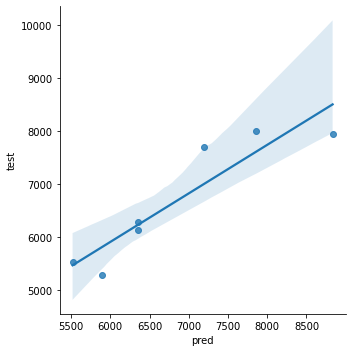

In [23]:
data = pd.DataFrame({'pred':y_pred,'test':y_test})

sns.lmplot(x="pred", y="test", data=data)

plt.show()